In [1]:
import pandas as pd
from pandas.core.arrays.sparse import SparseArray as _SparseArray
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [3]:
df_afit = pd.read_csv('/Users/Ramv/Downloads/aerofit_treadmill.csv')

The AeroFit market research team aims to enhance their understanding of the target audience for each type of treadmill offered by the company. By identifying key customer characteristics, they seek to provide more accurate and effective product recommendations to new customers. To achieve this goal, the team plans to investigate potential differences in customer demographics and preferences across various treadmill products.

In [4]:
df_afit

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [13]:
print(f"Number of rows: {df_afit.shape[0]}\nNumber of columns: {df_afit.shape[1]}")

Number of rows: 180
Number of columns: 9


In [5]:
df_afit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df_afit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Observations:

There are no missing values in the data.
There are 3 unique products in the dataset.
KP281 is the most frequently bought product.
Minimum & Maximum age of the person is 18 & 50, mean is 28.79 and 75% of persons have age less than or equal to 33.
Most of the people are having 16 years of education i.e. 75% of persons are having education <= 16 years.
Out of 180 data points, 104's gender is Male and rest are the female.
Standard deviation for Income & Miles is very high. These variables might have the outliers in it.

In [11]:
df_afit.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Observation: There are no NULL values

In [12]:
df_afit['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

Observation: There are 3 unique products available in the dataset.

Understanding the distribution of the data for the quantitative attributes:
Age, 
Education, 
Usage, 
Fitness, 
Income, 
Miles

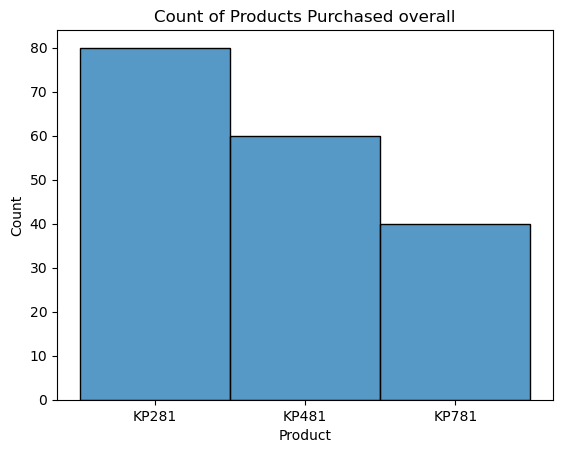

In [16]:
sns.histplot(df_afit["Product"])
product=df_afit.groupby("Product").aggregate(count=("Product","count")).reset_index()
plt.title('Count of Products Purchased overall')
plt.show()

Observation: KP281 is the most sold model and its also the lowest priced product.

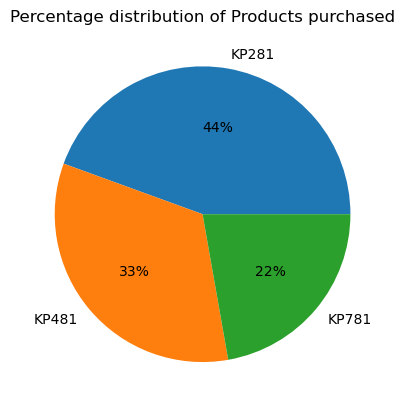

In [17]:
plt.pie(product["count"],labels=product["Product"],autopct='%.0f%%')
plt.title('Percentage distribution of Products purchased')
plt.show()

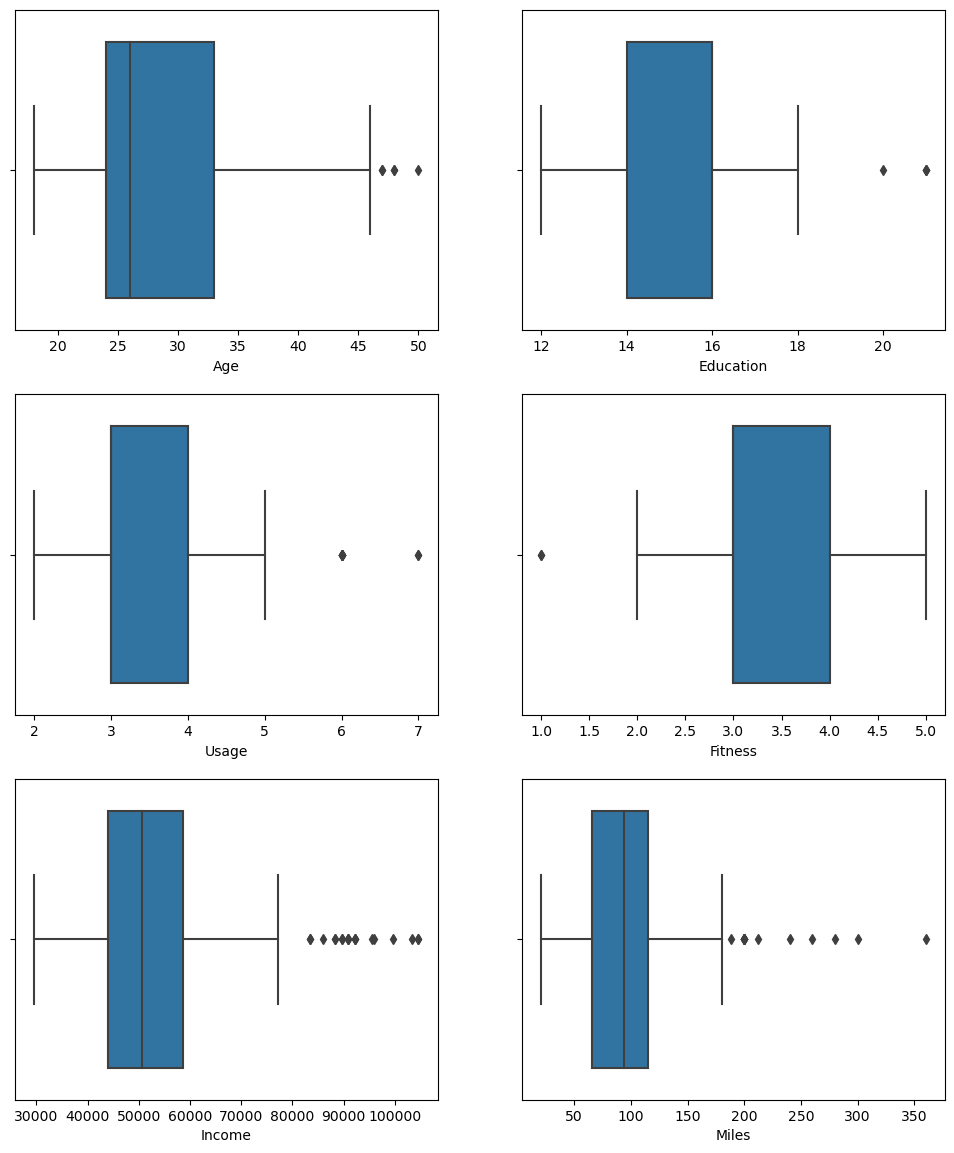

In [18]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.boxplot(data=df_afit, x="Age", orient='h', ax=axis[0,0])
sns.boxplot(data=df_afit, x="Education", orient='h', ax=axis[0,1])
sns.boxplot(data=df_afit, x="Usage", orient='h', ax=axis[1,0])
sns.boxplot(data=df_afit, x="Fitness", orient='h', ax=axis[1,1])
sns.boxplot(data=df_afit, x="Income", orient='h', ax=axis[2,0])
sns.boxplot(data=df_afit, x="Miles", orient='h', ax=axis[2,1])
plt.show()

Observation:-
From the boxplots it is quite clear that:

Age, Education and Usage are having very few outliers while Income and Miles are having more outliers.

In [ ]:
Below is the distribution of data for the quantitative attributes: Age, Education, Usage, Fitness, Income, Miles

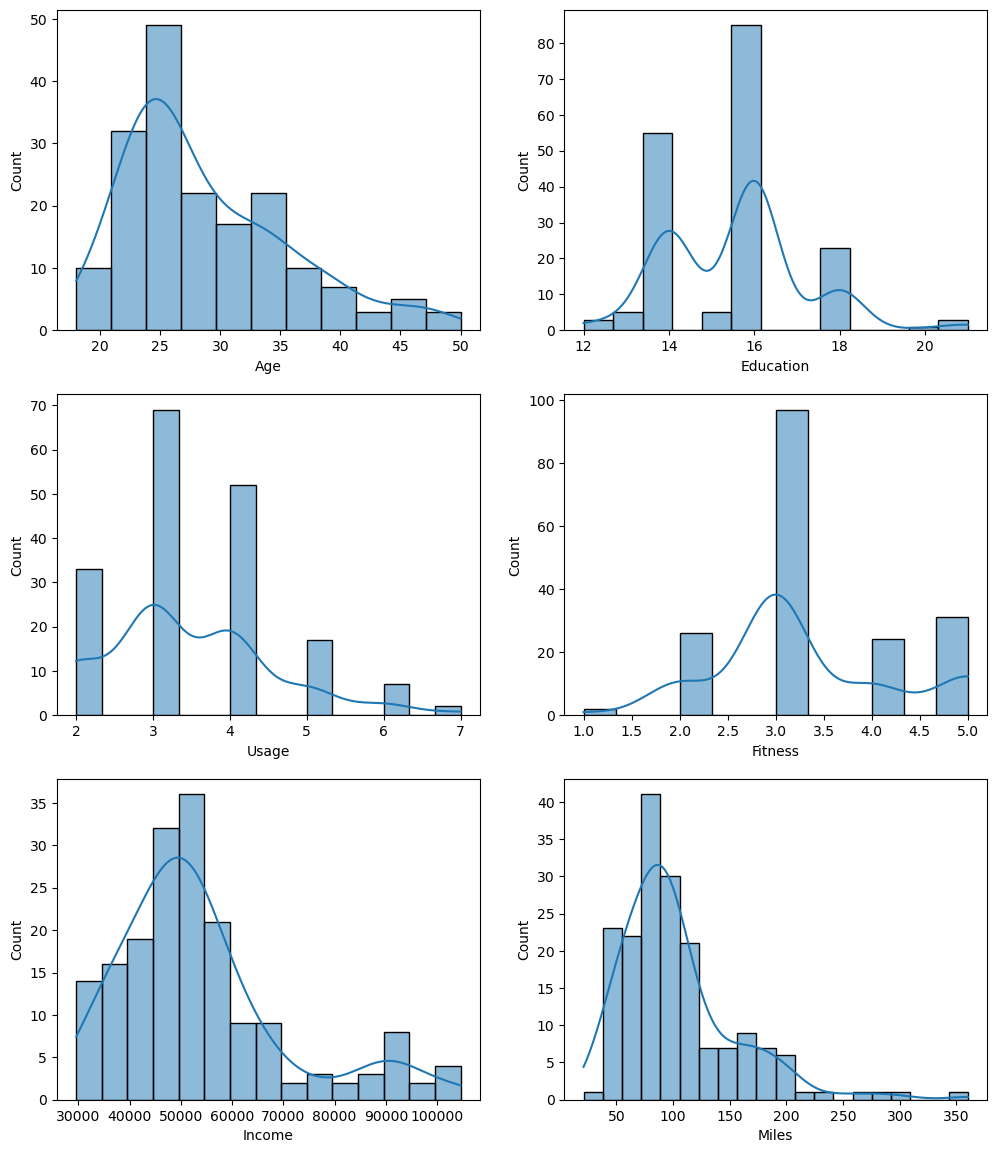

In [19]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.subplots_adjust(top=1.2)

sns.histplot(data=df_afit, x="Age", kde=True, ax=axis[0,0])
sns.histplot(data=df_afit, x="Education", kde=True, ax=axis[0,1])
sns.histplot(data=df_afit, x="Usage", kde=True, ax=axis[1,0])
sns.histplot(data=df_afit, x="Fitness", kde=True, ax=axis[1,1])
sns.histplot(data=df_afit, x="Income", kde=True, ax=axis[2,0])
sns.histplot(data=df_afit, x="Miles", kde=True, ax=axis[2,1])
plt.show()

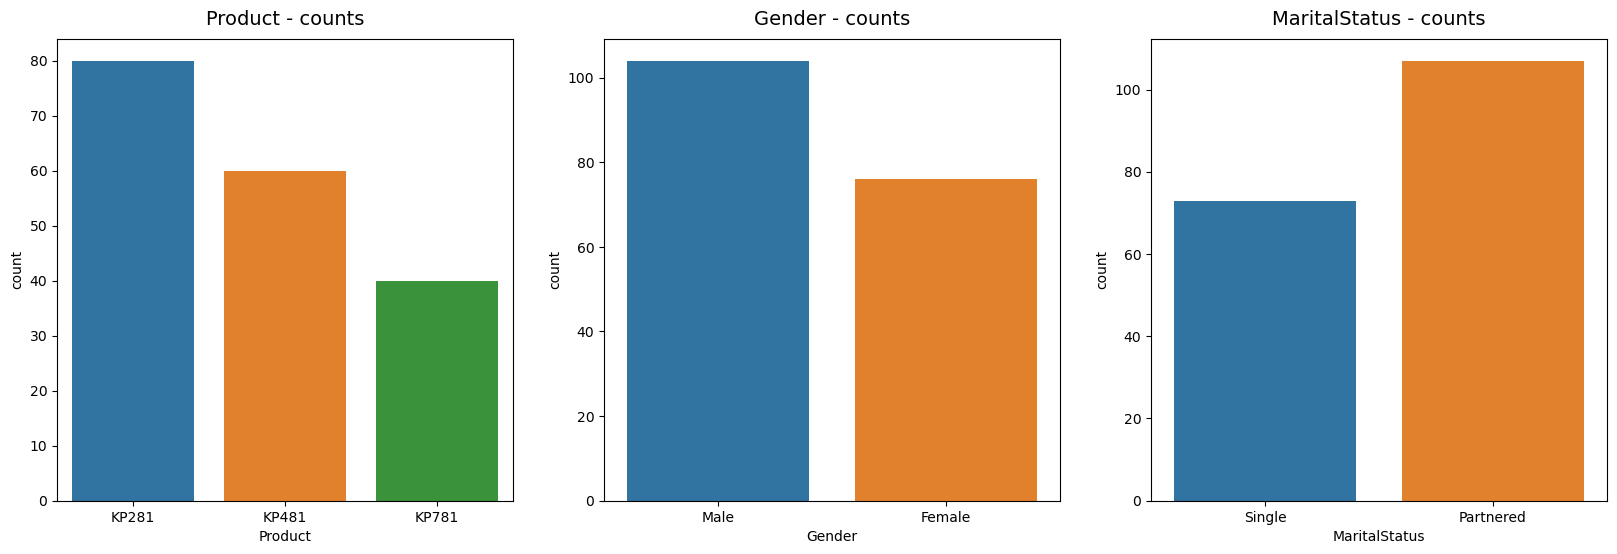

In [22]:
fig, axs = plt.subplots(nrows =1, ncols=3, figsize=(20,6))
sns.countplot(data = df_afit, x= "Product", ax = axs[0])
sns.countplot(data = df_afit, x= "Gender", ax = axs[1])
sns.countplot(data = df_afit, x= "MaritalStatus", ax = axs[2])
axs[0].set_title("Product - counts", pad =10, fontsize =14)
axs[1].set_title("Gender - counts", pad =10, fontsize =14)
axs[2].set_title("MaritalStatus - counts", pad =10, fontsize =14)
plt.show()

Observation:
KP281 is the most bought product of all the three products.
Male customer base is much higher than the female customer base.
Customers whose marital status as 'Partenered' has the biggest customer base overall.

In [27]:
df_pivot = df_afit[['Product', 'Gender', 'MaritalStatus']].melt()
df_pivot.groupby(['variable', 'value'])[['value']].count() / len(df)

value
variable      value              
Gender        Female     0.422222
              Male       0.577778
MaritalStatus Partnered  0.594444
              Single     0.405556
Product       KP281      0.444444
              KP481      0.333333
              KP781      0.222222

Observation:
Product:-
44.44% of the customers have purchased KP2821 product.
33.33% of the customers have purchased KP481 product.
22.22% of the customers have purchased KP781 product.
Gender
57.78% of the customers are Male.
MaritalStatus
59.44% of the customers are Partnered.

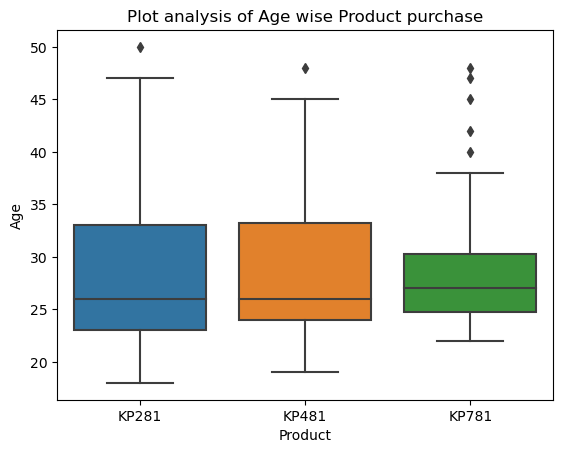

In [28]:
df_afit_age = df_afit.groupby(["Age","Product"]).aggregate(count=("Product","count")).reset_index()
sns.boxplot(y=df_afit["Age"],x=df_afit["Product"])
plt.title('Plot analysis of Age wise Product purchase')
plt.show()

Observation: the median age of the customers who bought KP781 is higher than the other two products. The median age of customers who bought KP281 & KP481 are same.

Bivariate Analysis

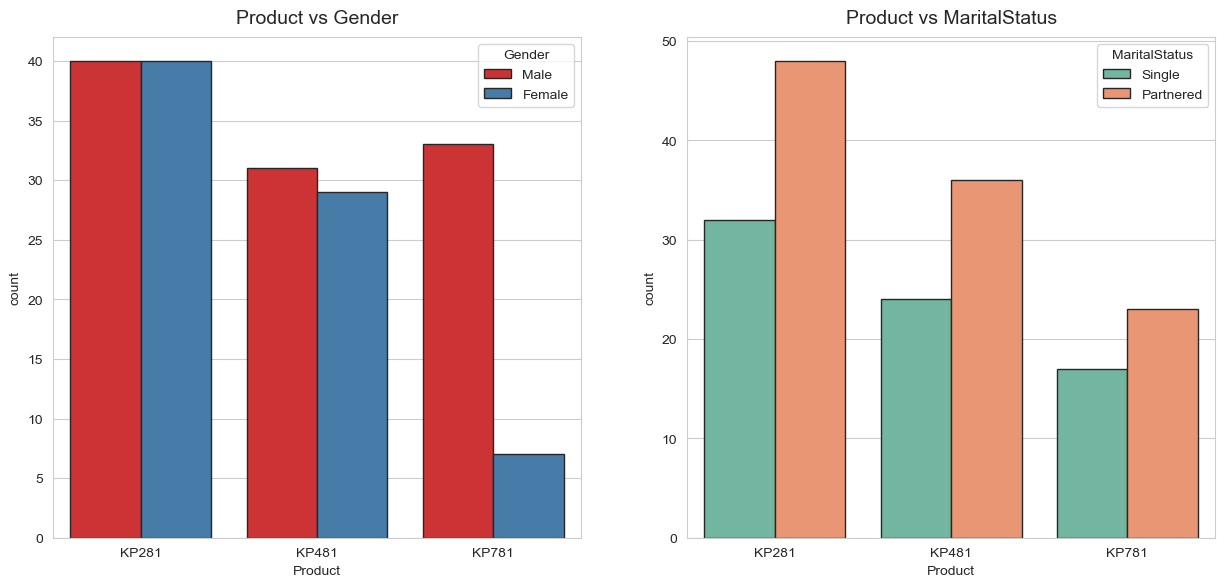

In [33]:
sns.set_style(style='whitegrid')
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6.5))
sns.countplot(data=df_afit, x='Product', hue='Gender', edgecolor="0.15", palette='Set1', ax=axs[0])
sns.countplot(data=df_afit, x='Product', hue='MaritalStatus', edgecolor="0.15", palette='Set2', ax=axs[1])
axs[0].set_title("Product vs Gender", pad=10, fontsize=14)
axs[1].set_title("Product vs MaritalStatus", pad=10, fontsize=14)
plt.show()

Observations:
Product vs Gender:-
Equal number of males and females have purchased KP281 product and almost same for the product KP481
Most of the Male customers have purchased the KP781 product which is an advanced product.
Product vs MaritalStatus:-
Customers who are Partnered, is more likely to purchase the product.

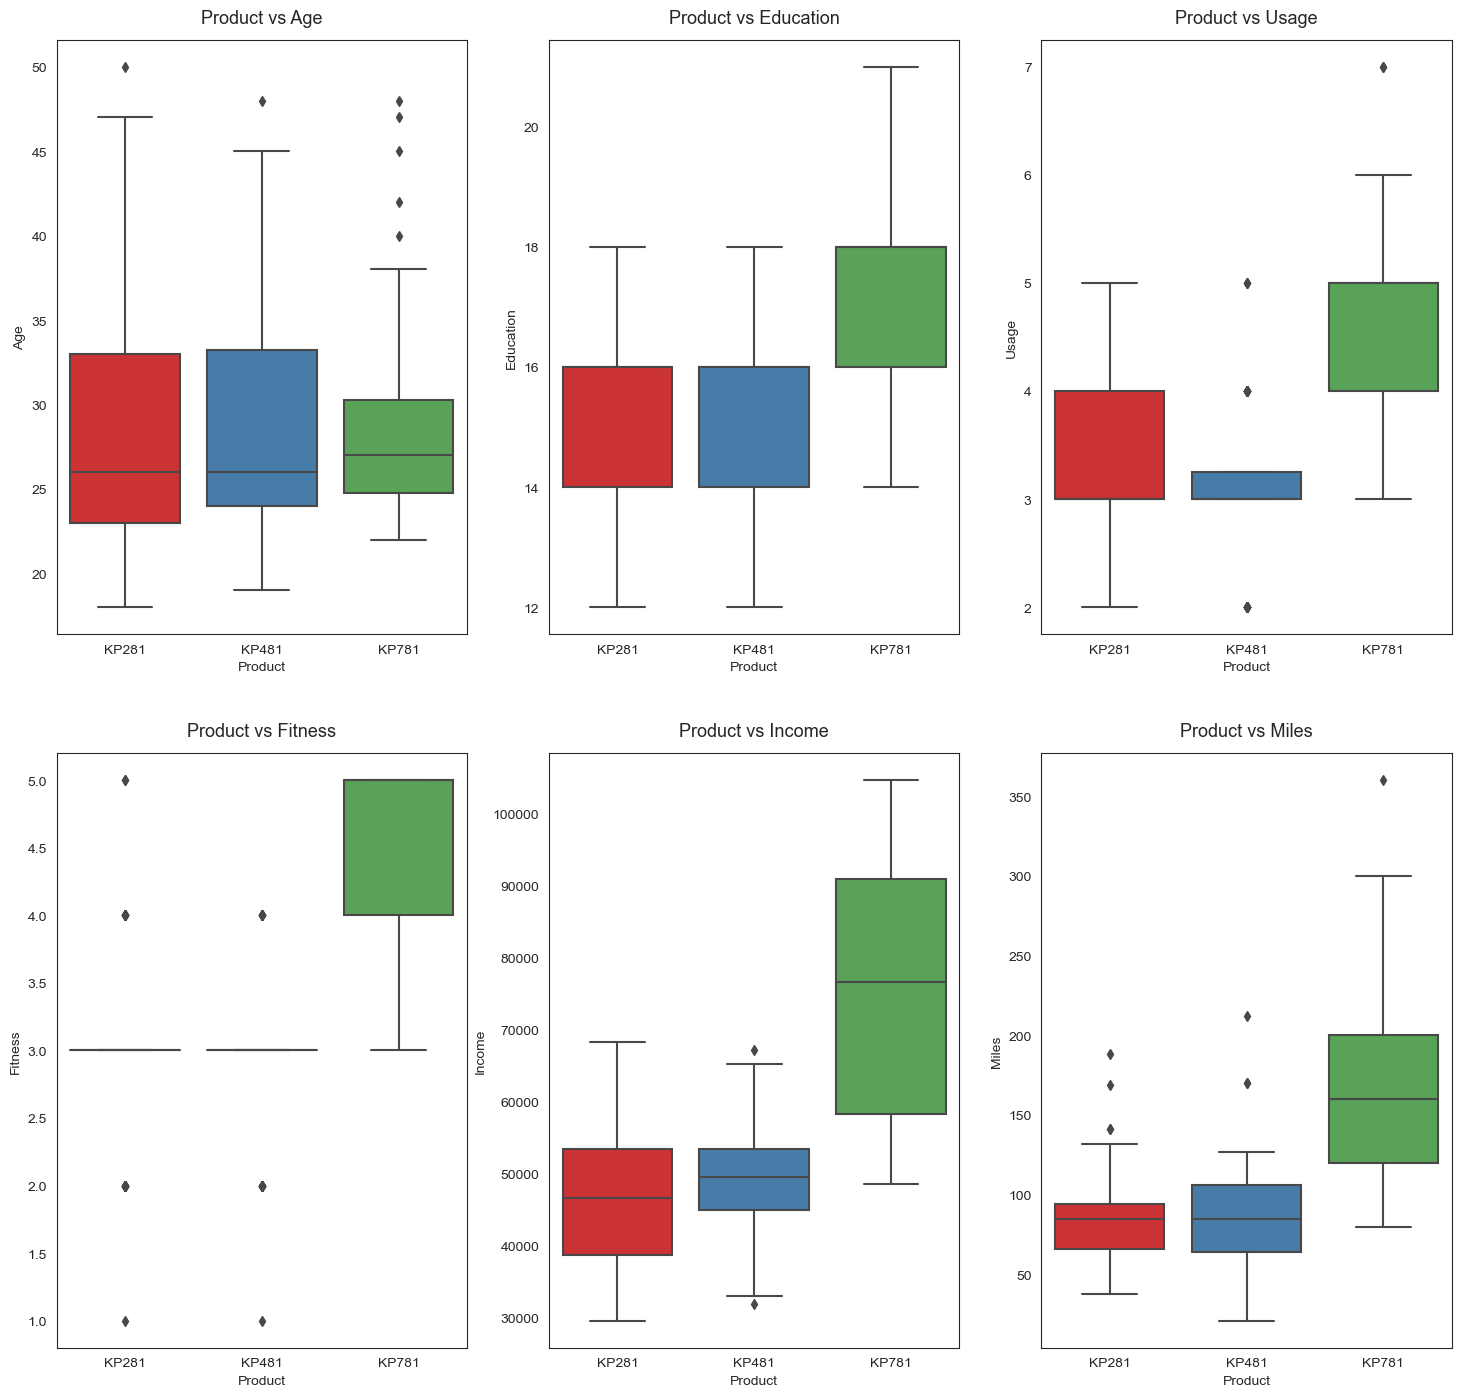

In [35]:
attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
sns.set_style("white")
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
fig.subplots_adjust(top=1.2)
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=df_afit, x='Product', y=attrs[count], ax=axs[i,j], palette='Set1')
        axs[i,j].set_title(f"Product vs {attrs[count]}", pad=12, fontsize=13)
        count += 1

Observations:
Product vs Age
Customers  who bought products KP281 & KP481 are having same median age.
Customers whose age lies between 25-30, are more likely to buy KP781 product.
Product vs Education
Customers whose education is greater than 16, have more chances to purchase the KP781 product.
While the customers with education less than 16 have equal chances of purchasing KP281 or KP481.
Product vs Usage
Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.
While the other customers are likely to purchase KP281 or KP481.
Product vs Fitness
The more the customer is fit (fitness >= 3), higher the chances of the customer to purchase the KP781 product.
Product vs Income
Higher the Income of the customer (Income >= 60000), higher the chances of the customer to purchase the KP781 product.
Product vs Miles
If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy KP781 product.

Overall, to conclude it looks like customers with higher treadmill usage, higher fitness score, higher income and who clocks 120 miles per week are the potential customers of K781 product.

Marginal Probability

In [36]:
df_afit['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

Conditional Probability

Probability of each product given gender.

In [41]:
def p_prod_gender(gender, print_marginal=False):
    if gender is not "Female" and gender is not "Male":
        return "Invalid gender value."
    
    df_afit1 = pd.crosstab(index=df_afit['Gender'], columns=[df_afit['Product']])
    p_781 = df_afit1['KP781'][gender] / df_afit1.loc[gender].sum()
    p_481 = df_afit1['KP481'][gender] / df_afit1.loc[gender].sum()
    p_281 = df_afit1['KP281'][gender] / df_afit1.loc[gender].sum()
    
    if print_marginal:
        print(f"P(Male): {df_afit1.loc['Male'].sum()/len(df_afit):.2f}")
        print(f"P(Female): {df_afit1.loc['Female'].sum()/len(df_afit):.2f}\n")
    
    print(f"P(KP781/{gender}): {p_781:.2f}")
    print(f"P(KP481/{gender}): {p_481:.2f}")
    print(f"P(KP281/{gender}): {p_281:.2f}\n")
    
p_prod_gender('Male', True)
p_prod_gender('Female')

P(Male): 0.58
P(Female): 0.42

P(KP781/Male): 0.32
P(KP481/Male): 0.30
P(KP281/Male): 0.38

P(KP781/Female): 0.09
P(KP481/Female): 0.38
P(KP281/Female): 0.53



Probability of each product given marital status.

In [ ]:
def p_prod_maritalstatus(MaritalStatus, print_marginal=False):
    if MaritalStatus is not "Single" and MaritalStatus is not "Partnered":
        return "Invalid status value."
    
    df_afit2 = pd.crosstab(index=df_afit['MaritalStatus'], columns=[df_afit['Product']])
    p_781 = df_afit2['KP781'][MaritalStatus] / df_afit2.loc[MaritalStatus].sum()
    p_481 = df_afit2['KP481'][MaritalStatus] / df_afit2.loc[MaritalStatus].sum()
    p_281 = df_afit2['KP281'][MaritalStatus] / df_afit2.loc[MaritalStatus].sum()
    
    if print_marginal:
        print(f"P(Single): {df_afit2.loc['Single'].sum()/len(df_afit):.2f}")
        print(f"P(Partnered): {df_afit2.loc['Partnered'].sum()/len(df_afit):.2f}\n")
    
    print(f"P(KP781/{MaritalStatus}): {p_781:.2f}")
    print(f"P(KP481/{MaritalStatus}): {p_481:.2f}")
    print(f"P(KP281/{MaritalStatus}): {p_281:.2f}\n")
    
p_prod_maritalstatus('Single', True)
p_prod_maritalstatus('Partnered')

Summary of Probability results:-
Customers having more education qualification, higher income and good fitness have high probability of buying the KP781 treadmill.
There is a higher Probability that customer has avg. salary 50000 are more likely to buy KP281.

Correlation

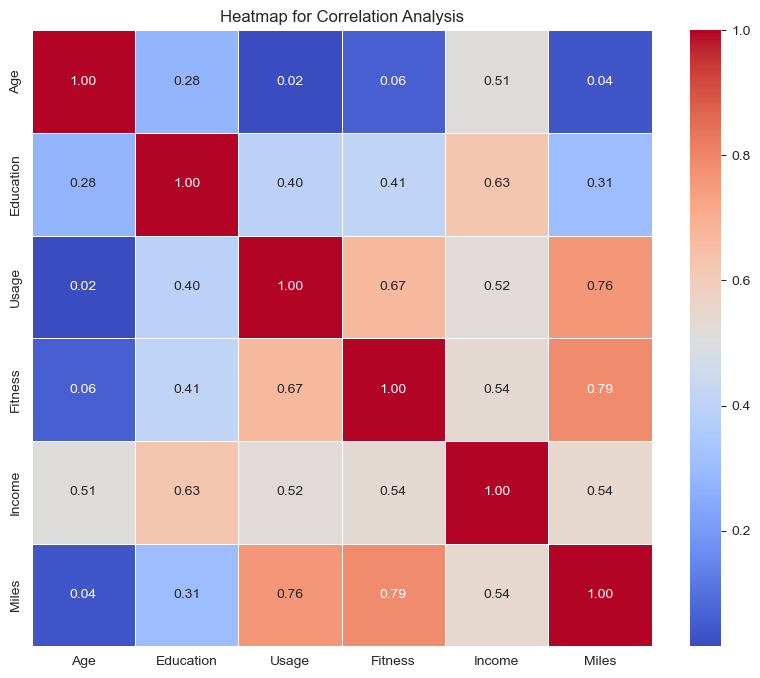

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_afit.corr(numeric_only= True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap for Correlation Analysis')
plt.show()

Miles & Fitness & Miles & Usage attributes are highly correlated, which clearly shows that customer fitness level is high they use more treadmills.

Income and Education shows a strong correlation. High-income and highly educated people prefer the KP781 treadmill which is an advanced equipment.

There is no correlation between Usage & Age or Fitness & Age attributes, which gives us a conclusion that Age is not a barrier in using specific model of treadmills.

Overall Insights:-

83% of treadmills sales have come from the customers with income between $35,000 to $80,000.

88% of treadmills are purchased. by customers aged 20 to 40.

Customers who are aged between 25-30 form the major customer base.

Customers who are Married have at highest fitness of 4.5 with age 30

Customers who are Single have highest fitness of 5 with age 29.

KP281, due to its low price attracts both Single and Married customers.

KP781 is the only model purchased by a customer who has more than 20 years of education and an income of over $ 85,000.


Customer Profile:-


Customer categorisation based on fitness level:-

Moderately Fit Customers: This segment would include customers who have purchased KP281 or KP481.

Highly Fit Customers: This segment would include customers who have purchased KP781.
Segments Based on Miles Covered

Customer categorisation based on fitness:-

Casual users: The customers fall in this category are not very consistent in achieving their fitness goals and are only using the treadmill a few times per week. They are most likely to purchase the KP281 or KP481 models.

Committed users: The customers fall in this category are moderately consistent in achieving  their fitness goals and are using the treadmill 4 or 5 times per week. They are most likely to purchase the KP481 model.

Hardcore users: The customers fall in this category are higly consistent in achieving thier fitness goals and are using the treadmill 6 or 7 times per week. They are most likely to purchase the KP781 model.


Recommendations:-

Aerofit should conduct market research to determine if it can attract customers with income under $35,000 by developing targetted marketing campaigns.

Aerofit could cut the price of KP481 so that low income customers would consider upgrading it to KP481.

Aerofit could also consider reducing the price of KP781 so that people having avg income $50,000 more mid range customers may consider buying KP781.

As most customers fall between $20,000 to $80,000 income group,
Aerofit should emphasize the affordability and long-term cost savings of  products. For the higher-income group, highlight the premium features and benefits of the more expensive KP781 product.

Aerofit can also conduct surveys to undertsand what more features can be added to the treadmills such as heart rate monitoring, bio-metric based features and customizable workout settings to keep the customers challenged and engaged.

Aerofit should design a personalized training programs, incentives, and outdoor meet-ups to keep them engaged would help in building a solid brand image.

Aerofit should also develop marketing campaigns and features that appeal specifically to female fitness enthusiasts as there is a potential to grow thier customer base.
